In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn import metrics


In [4]:
df=pd.read_csv('stock.csv')
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.0,267.899994,250.029999,254.259995,254.259995,11896100


In [5]:
df.shape

(1009, 7)

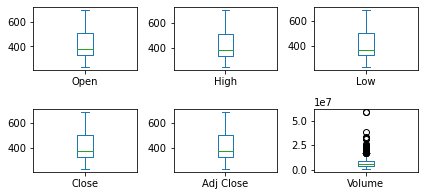

In [6]:
plt.subplot(3,3,1)
df['Open'].plot(kind='box')
plt.subplot(3,3,2)
df['High'].plot.box()
plt.subplot(3,3,3)
df['Low'].plot.box()
plt.subplot(3,3,4)
df['Close'].plot.box()
plt.subplot(3,3,5)
df['Adj Close'].plot.box()
plt.subplot(3,3,6)
df['Volume'].plot.box()
plt.tight_layout()


<AxesSubplot:>

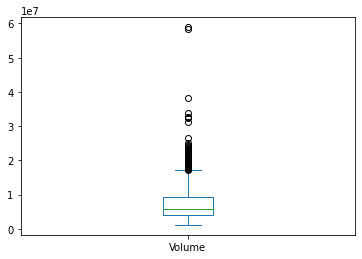

In [7]:
df['Volume'].plot.box()


In [8]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


<AxesSubplot:xlabel='High', ylabel='Low'>

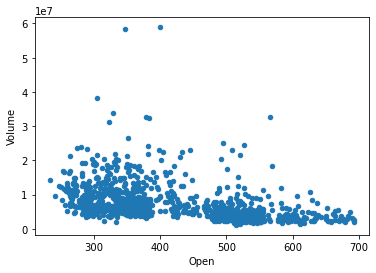

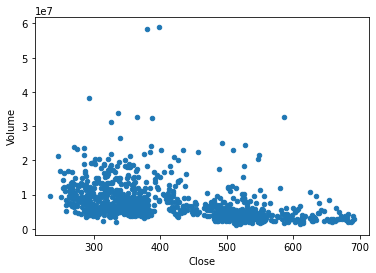

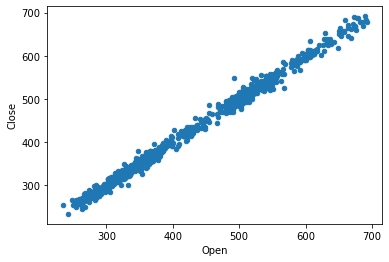

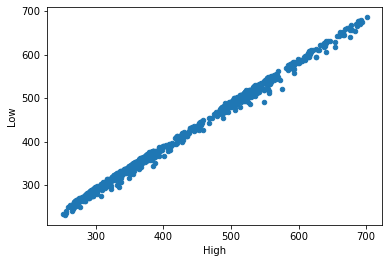

In [10]:
df.plot.scatter('Open','Volume')




df.plot.scatter('Close','Volume')


df.plot.scatter('Open','Close')





df.plot.scatter('High','Low')



Volume:  upperlimit:  17168150.0 lowelimit: -3753850.0


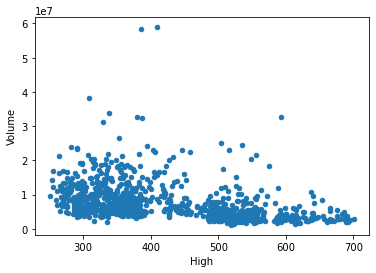

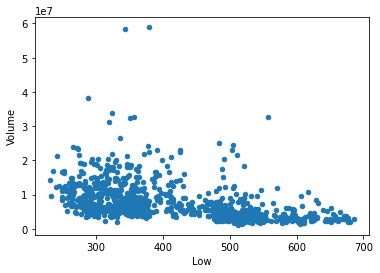

In [11]:
df.plot.scatter('High','Volume')
df.plot.scatter('Low','Volume')
def Outlier_limits(Column_name):
    Q1,Q3=df[Column_name].quantile([.25,.75])
    IQR=Q3-Q1
    low=Q1-(1.5*IQR)
    high=Q3+(1.5*IQR)
    return(high,low)
high_volume,Low_volume=Outlier_limits('Volume')
print('Volume: ','upperlimit: ',high_volume,'lowelimit:',Low_volume)

<AxesSubplot:>

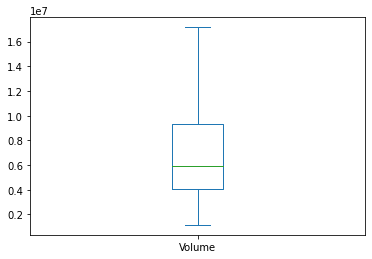

In [12]:
df.loc[df['Volume']>high_volume,'Volume']=high_volume

df['Volume'].plot.box()


<AxesSubplot:xlabel='Open', ylabel='Volume'>

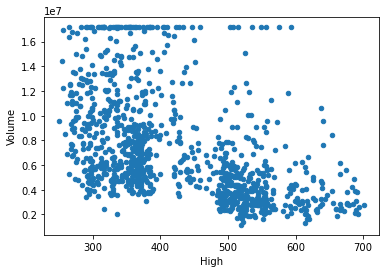

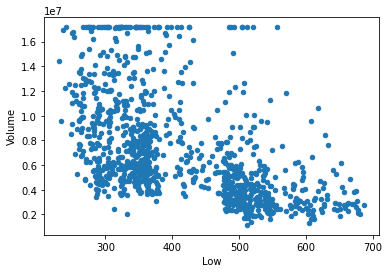

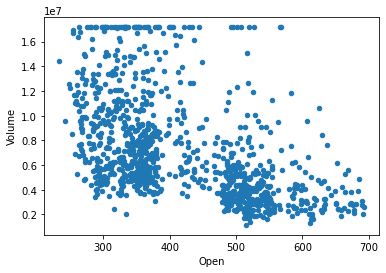

In [13]:

df.plot.scatter('High','Volume')
df.plot.scatter('Low','Volume')
df.plot.scatter('Open','Volume')


In [14]:

df.drop('Adj Close',axis=1,inplace=True)


<AxesSubplot:>

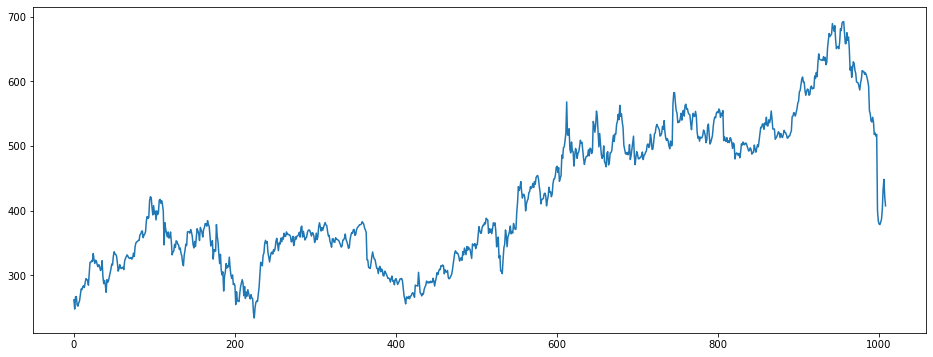

In [15]:
df['Open'].plot(figsize=(16,6))

In [16]:
x=df[['Open','High','Low','Volume']]
y=df['Close']


In [17]:
from sklearn.model_selection import train_test_split
x_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0)


In [18]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()


In [19]:
lreg.fit(x_train,Y_train)

pred=lreg.predict(X_test)
pred

pred.shape

df1=pd.DataFrame(Y_test,pred)


In [24]:
df1=pd.DataFrame({'Actual':Y_test,'Predicted':pred})


In [25]:
df1

,Actual,Predicted
801,553.729980,553.950596
311,379.059998,379.765454
85,361.399994,360.295839
435,281.859985,283.814102
204,261.429993,260.035465
...,...,...
583,425.920013,422.909828
200,270.600006,273.357664
767,546.150024,537.980509
1000,366.420013,374.989007


In [22]:

df1.corr()


,Close
Close,NaN


In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score

lreg.score(X_test,Y_test)


0.9982518178773739